# Model Validation:

It is the process of ensuring that your model is performing good on unseen data. It consist of:



*   Selecting best model 
*   Selecting the metrics to judge the performance of model
*   Selecting best parameters
*   Acheiving good accuracy





In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df = pd.read_csv('/content/candy-data.csv')

In [71]:
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [73]:
df.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [77]:
df = df.drop(['competitorname'],axis=1)
df.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [78]:
df.isnull().sum()

chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [79]:
X =  df.drop('winpercent',axis=1)
X.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860
1,1,0,0,0,1,0,0,1,0,0.604,0.511
2,0,0,0,0,0,0,0,0,0,0.011,0.116
3,0,0,0,0,0,0,0,0,0,0.011,0.511
4,0,1,0,0,0,0,0,0,0,0.906,0.511


In [81]:
y  = df['winpercent']

# Model Building

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

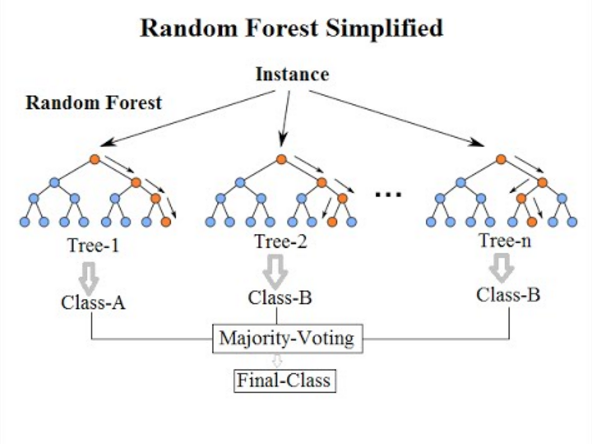

In [85]:
model = RandomForestRegressor(n_estimators=500, random_state=1111)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=1111)

# Mean Absolute Error

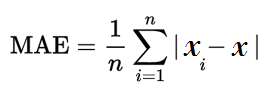

In [88]:
predictions = model.predict(X_test)
print("{0:.2f}".format(mean_absolute_error(y_true=y_test, y_pred=predictions)))

9.74


# Mean Squared Error

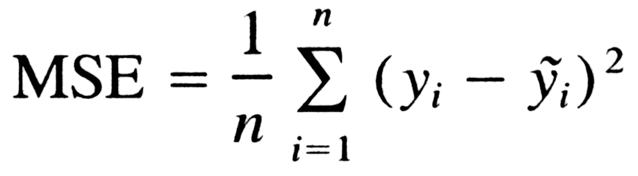

In [94]:
predictions = model.predict(X_test)
print("{0:.2f}".format(mean_squared_error(y_true=y_test, y_pred=predictions)))

168.60


# Classification Problem and their Evaluation metrics

In [104]:
df = pd.read_csv('/content/Iris.csv')

In [105]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [107]:
labels = {
    'Iris-setosa':0,
    'Iris-versicolor':1,
    'Iris-virginica':2
}

df['target'] = df['Species'].map(labels)

In [108]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [109]:
X = df.drop(['Id','Species','target'],axis=1)
y = df['target'] 

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [112]:
model = RandomForestClassifier(n_estimators=300)
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.9111111111111111

# Confusion Matrix

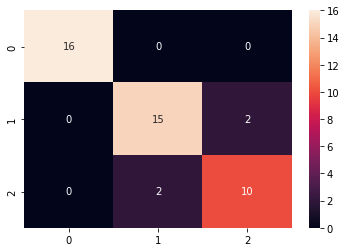

In [114]:
pred = model.predict(X_test)

cm = confusion_matrix(y_test, pred)

sns.heatmap(cm, annot=True)
plt.show()

# Classification Report

In [115]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.88      0.88      0.88        17
           2       0.83      0.83      0.83        12

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



# Cross Validation:

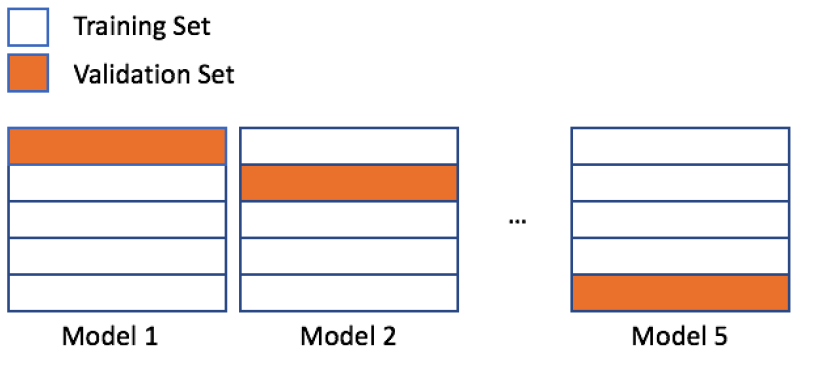

In [117]:
rfc = RandomForestClassifier()


cross_val_score(estimator= rfc,X=X, y=y, cv=3)

array([0.98, 0.94, 0.98])

# Hyper Parameter Tunning

In [125]:
estimators = [100,200,500]
depth = [4, 6, 8]
scores = []
params = []

for estimator in estimators:
  for max_depth in depth:
    rfc = RandomForestClassifier(n_estimators=estimator, max_depth=max_depth)
    rfc.fit(X_train, y_train)

    scores.append(rfc.score(X_test, y_test))
    params.append([estimator, max_depth])

In [130]:
model_parameters = pd.DataFrame({'Score':scores,'params':params})

In [131]:
model_parameters

,Score,params
0,0.911111,"[100, 4]"
1,0.911111,"[100, 6]"
2,0.888889,"[100, 8]"
3,0.911111,"[200, 4]"
4,0.911111,"[200, 6]"
5,0.911111,"[200, 8]"
6,0.911111,"[500, 4]"
7,0.911111,"[500, 6]"
8,0.911111,"[500, 8]"


# Resources:

https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/

https://machinelearningmastery.com/a-gentle-introduction-to-model-selection-for-machine-learning/

https://machinelearningmastery.com/how-to-evaluate-machine-learning-algorithms/
